In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
df=pd.read_csv(r"G:\Deep Learning\datasets\Churn_Modelling.csv")

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.shape

(10000, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [41]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True).astype(int)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
x=df.drop(columns="Exited")
y=df["Exited"]

In [46]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [47]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int32

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [49]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [50]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [51]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [73]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5991 - loss: 0.6355 - val_accuracy: 0.7975 - val_loss: 0.4804
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4582 - val_accuracy: 0.8119 - val_loss: 0.4333
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8038 - loss: 0.4322 - val_accuracy: 0.8206 - val_loss: 0.4136
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8227 - loss: 0.4131 - val_accuracy: 0.8244 - val_loss: 0.4028
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.4026 - val_accuracy: 0.8306 - val_loss: 0.3928
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.3808 - val_accuracy: 0.8356 - val_loss: 0.3830
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.3854 - val_accuracy: 0.8381 - val_loss: 0.3776
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3751 - val_accu

In [74]:
history.history

{'accuracy': [0.7229687571525574,
  0.8026562333106995,
  0.8131250143051147,
  0.8220312595367432,
  0.8315625190734863,
  0.8392187356948853,
  0.8451562523841858,
  0.8503124713897705,
  0.8532812595367432,
  0.8573437333106995,
  0.8595312237739563,
  0.8598437309265137,
  0.8592187762260437,
  0.8606250286102295,
  0.8592187762260437,
  0.8589062690734863,
  0.8610937595367432,
  0.860156238079071,
  0.8604687452316284,
  0.8618749976158142,
  0.8615624904632568,
  0.8614062666893005,
  0.862500011920929,
  0.8617187738418579,
  0.8609374761581421,
  0.8610937595367432,
  0.8607812523841858,
  0.8623437285423279,
  0.8617187738418579,
  0.8650000095367432,
  0.8617187738418579,
  0.8660937547683716,
  0.8639062643051147,
  0.8607812523841858,
  0.86328125,
  0.8643749952316284,
  0.8642187714576721,
  0.8637499809265137,
  0.8656250238418579,
  0.8648437261581421,
  0.8657812476158142,
  0.8660937547683716,
  0.8659374713897705,
  0.8639062643051147,
  0.8668749928474426,
  0.8670

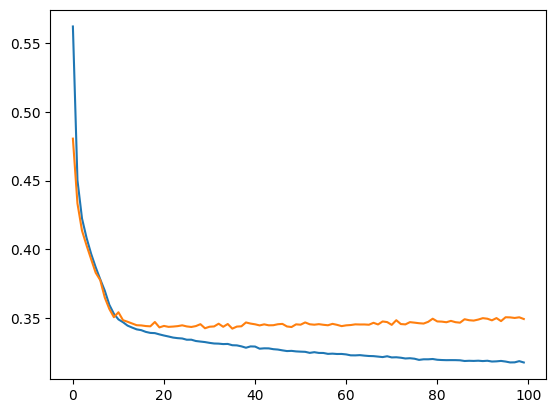

In [76]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

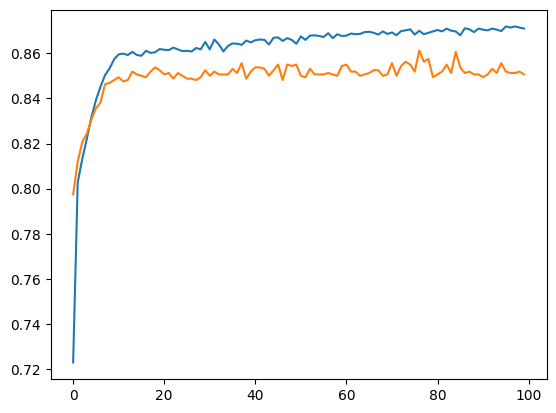

In [77]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [66]:
model.layers[1].get_weights()

[array([[-0.1032291 ,  0.10980581,  0.10508113, -0.14071141, -0.5528609 ,
          0.65449923,  0.20978202, -0.22326177, -1.1030146 ,  0.30929473,
         -0.39201778],
        [-0.62616223,  0.5607701 , -0.23751836,  0.36141834,  0.41658872,
          0.14780283,  0.73911285, -0.0430332 , -0.09267689,  0.00125761,
         -0.16370651],
        [-0.03298146, -0.50118923, -0.52407545, -0.6343504 ,  0.46063006,
          0.40597975,  0.14389823,  0.1210238 ,  0.27424031, -0.69657385,
          0.1295146 ],
        [ 0.5852206 ,  0.34776694, -0.1470947 ,  0.07216525, -0.05975679,
          0.56740314, -0.593631  ,  0.49481553,  0.28356037, -0.45187703,
          0.40878507],
        [-0.5501871 , -0.28333378, -0.01522909,  0.33416396, -0.5065834 ,
          0.0790637 ,  0.42287093,  0.36620787, -0.10219705, -0.81643575,
          0.39742422],
        [ 0.77730316, -0.5874227 , -0.03274748, -0.49725392,  0.00548025,
          0.17413364, -0.3621115 ,  0.5812635 , -0.3616506 , -0.5212187

In [67]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [68]:
y_pred=np.where(y_log>0.5,1,0)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635